<a href="https://colab.research.google.com/github/solobt777/Python_solobt777/blob/main/Week-4_ML_Classification/SVM_classifier_w_GridSearch_ROC_N_Test_Train_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### SVM Classifier with Gridsearch with Probablity and scoring param and finding individual scores with ROC, F1

In [5]:
#### SVM claswsificationsifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hope AI by Ramisha/data/CKD.csv')

df = pd.get_dummies(df, drop_first=True)

X = df.drop('classification_yes', axis=1)
y = df['classification_yes']
df.head()


,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.0,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,False,False,False,False,False,False,True,True,False,True
1,3.0,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,False,False,False,False,False,True,False,False,True
2,4.0,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,False,False,False,False,False,True,False,False,True
3,5.0,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,True,False,False,False,False,False,True,False,True,True
4,5.0,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,True,False,False,False,False,False,True,False,False,True


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
###  Grid Search CV to find the best parameters for SVC

# Stage 1: Quick search with reduced grid
param_grid = {'kernel':['rbf','poly','sigmoid','linear'],
                'C':[100,1000,2000,3000]}


# from sklearn.model_selection import GridSearchCV
# gsv = GridSearchCV(SVC(probability=True), param_grid, scoring='f1_weighted', cv=3, verbose=1, n_jobs=4)
gsv = GridSearchCV(SVC(), param_grid, cv=3, verbose=1, n_jobs=4)
gsv.fit(X_train, y_train)
gsv.best_params_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'C': 100, 'kernel': 'linear'}

Best parameters found:  {'C': 100, 'kernel': 'linear'}
Best estimator found:  SVC(C=100, kernel='linear')


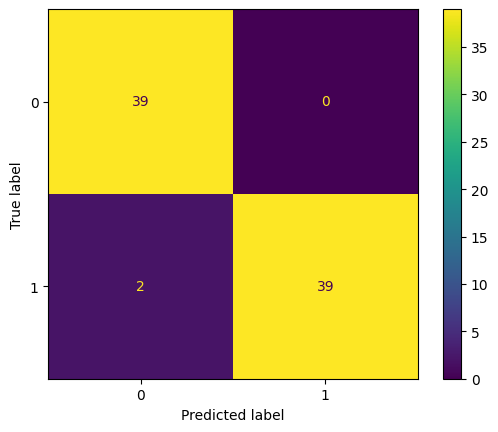

              precision    recall  f1-score   support

       False       0.95      1.00      0.97        39
        True       1.00      0.95      0.97        41

    accuracy                           0.97        80
   macro avg       0.98      0.98      0.97        80
weighted avg       0.98      0.97      0.97        80



In [12]:
# print the best parameters after tuning
print("Best parameters found: ", gsv.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator found: ", gsv.best_estimator_)
re = gsv.cv_results_

gsv.predict(X_test)
y_pred_grid = gsv.predict(X_test)

cm = confusion_matrix(y_test, y_pred_grid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_grid))


In [13]:
f1 = f1_score(y_test, y_pred_grid)
print("F1 Score: ", f1)

F1 Score:  0.975
